In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

#%matplotlib inline
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
marketing_df = pd.read_csv('Data.csv')
marketing_df.head()

,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507


In [14]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       6817 non-null   object 
 1   State                          6817 non-null   object 
 2   CLV                            6817 non-null   float64
 3   Coverage                       6817 non-null   object 
 4   Income                         6817 non-null   int64  
 5   loc_type                       6817 non-null   object 
 6   monthly_premium                6817 non-null   int64  
 7   months_last_claim              6817 non-null   int64  
 8   Months_Since_Policy_Inception  6817 non-null   int64  
 9   Total_Claim_Amount             6817 non-null   float64
 10  Vehicle_Class                  6817 non-null   object 
 11  avg_vehicle_age                6817 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage:

In [15]:
print ("Rows               : ",marketing_df.shape[0])
print ("columns            :  ", marketing_df.shape[1])
print ("\nFeatures         :\n ",marketing_df.columns.tolist())
print ("\n Missing Values  : ",marketing_df.isnull().any())

Rows               :  6817
columns            :   12

Features         :
  ['Customer', 'State', 'CLV', 'Coverage', 'Income', 'loc_type', 'monthly_premium', 'months_last_claim', 'Months_Since_Policy_Inception', 'Total_Claim_Amount', 'Vehicle_Class', 'avg_vehicle_age']

 Missing Values  :  Customer                         False
State                            False
CLV                              False
Coverage                         False
Income                           False
loc_type                         False
monthly_premium                  False
months_last_claim                False
Months_Since_Policy_Inception    False
Total_Claim_Amount               False
Vehicle_Class                    False
avg_vehicle_age                  False
dtype: bool


In [16]:
marketing_df.describe()

,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,8130.229340,50456.580461,92.963034,15.046941,47.832624,377.840789,50.126257
std,6949.067972,24305.956566,34.615160,10.064762,27.895350,252.648952,9.919767
min,2119.894333,10037.000000,61.000000,0.000000,0.000000,0.099007,11.875974
25%,4090.750678,28432.000000,68.000000,6.000000,24.000000,210.100003,43.449925
50%,5810.630529,48081.000000,83.000000,14.000000,48.000000,340.800000,50.100924
75%,9075.768214,70187.000000,109.000000,23.000000,71.000000,498.612632,56.877234
max,83325.381190,99981.000000,297.000000,35.000000,99.000000,2893.239678,83.387485


AttributeError: 'Rectangle' object has no property 'hist'

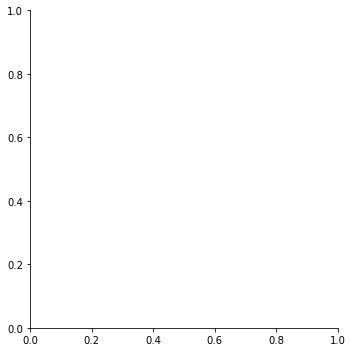

In [39]:
sns.displot(marketing_df['avg_vehicle_age'], hist=True, hist_kws=dict(ec="k")) #it is distplot not displot

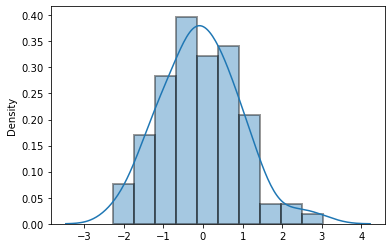

In [40]:
x = np.random.randn(100)
ax = sns.distplot(x, hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()


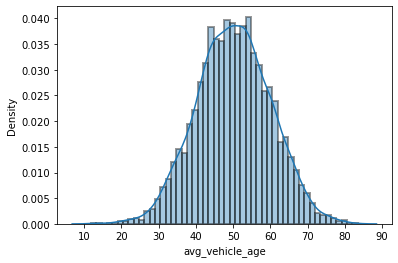

In [42]:
y=marketing_df['avg_vehicle_age']
ay = sns.distplot(y, hist_kws=dict(edgecolor="k", linewidth=2))


<AxesSubplot:xlabel='avg_vehicle_age', ylabel='Density'>

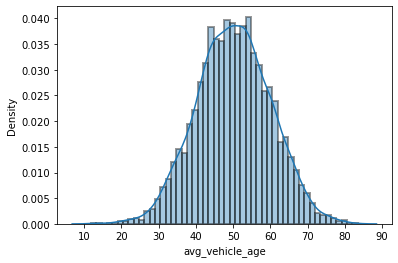

In [45]:
sns.distplot(marketing_df['avg_vehicle_age'], hist_kws=dict(edgecolor="k", linewidth=2))

<AxesSubplot:xlabel='avg_vehicle_age', ylabel='Density'>

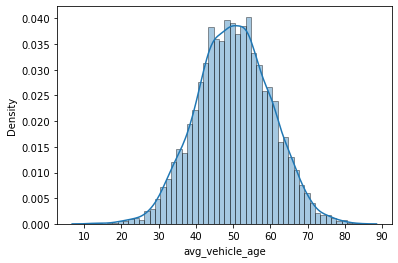

In [46]:
sns.distplot(marketing_df['avg_vehicle_age'], hist=True, hist_kws=dict(ec="k"))





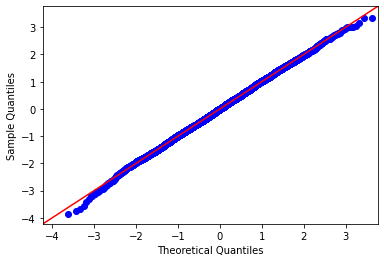

In [31]:
plot=sm.qqplot(marketing_df['avg_vehicle_age'], line="45", fit = True)

<AxesSubplot:xlabel='avg_vehicle_age'>

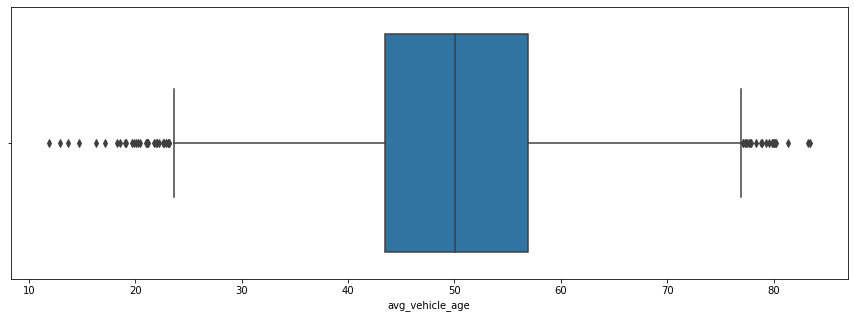

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(x="avg_vehicle_age", data=marketing_df)

###### null hypothesis - data came from a normal distribution
###### Alternate hypothesis - Unlikely that tehe data come from a mormal distribution

In [47]:
# normal test going to test wheather a sample differ from normal distribution
# if p > 0.05 data is normal and p<0.05 data is not normal
chi2, p = stats.normaltest(marketing_df['avg_vehicle_age'])
print('Chi2 = %.2f, pvalue = %.3f' %(chi2,p))

Chi2 = 1.04, pvalue = 0.593


##### Null hypothesis - Sample is drawn from population that follows a particulat distrubtion
##### Alternate hypothesis - data did not come from the chosen distribution

In [54]:
#anderson darling test will help us in findng is the sample data came from sepcific distribution
stats.anderson(marketing_df['avg_vehicle_age'],dist='norm')

AndersonResult(statistic=0.38327277704684093, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### assuming data is not normally distributed then which transformation need to applied
#### this can be decided using boxcox transformation

In [62]:
from scipy import stats
_,l=stats.boxcox(marketing_df['avg_vehicle_age'])

In [63]:
#_ will give the transformed value where as i will give what function we need to apply to make the data normal distribution

print(_)

[44.44389716 53.83105091 79.32549031 ... 73.30260363 52.95181409
 49.62516134]


In [64]:
print(l)

1.0401662851027633


In [65]:
print ("lamda    : ",l)

lamda    :  1.0401662851027633


In [ ]:
##############################
# Lanbda       Transformation
###############################

#   -2            1/Square(input)
#   -1            1/(input)
#   -0.5          1/sqrt(input)
#    0            log(input)
#    0.5          sqrt(input)
#    1            As is
#    2            SQUARE(input)



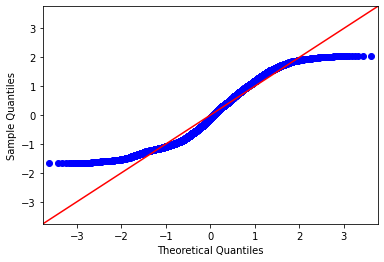

In [66]:
plot=sm.qqplot(marketing_df['Income'], line="45", fit = True)

<AxesSubplot:xlabel='Income'>

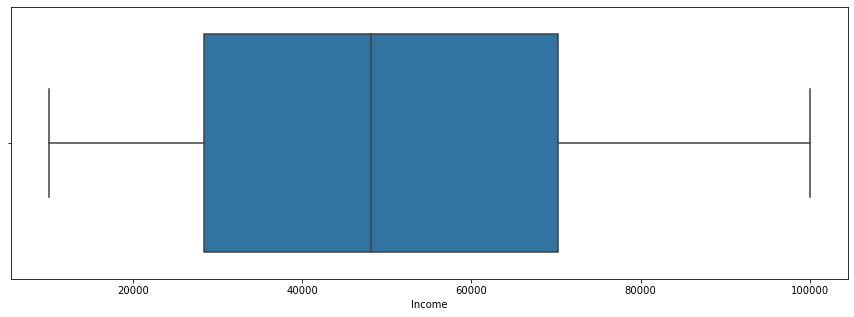

In [68]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Income", data=marketing_df)

<AxesSubplot:xlabel='Income', ylabel='Density'>

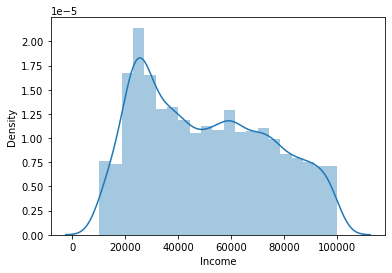

In [69]:
sns.distplot(marketing_df['Income'],hist=True)

In [70]:
chi2, p = stats.normaltest(marketing_df['Income'])
print('Chi2 = %.2f, pvalue = %.3f' %(chi2,p))

Chi2 = 2482.05, pvalue = 0.000


In [74]:
#anderson darling test shows stat value as 94.6 where us significance level 5% vaule is 0.7 stats > alpha
#so not normally distributed
stats.anderson(marketing_df['Income'],dist='norm')

AndersonResult(statistic=94.67577589421035, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [72]:
from scipy import stats
_,l1=stats.boxcox(marketing_df['Income'])
print(_)
print(l1)

[288.26551173 270.35715747 257.74489153 ... 321.76888064 187.59951339
 188.90985644]
0.44437538279540056


<AxesSubplot:xlabel='Income', ylabel='Density'>

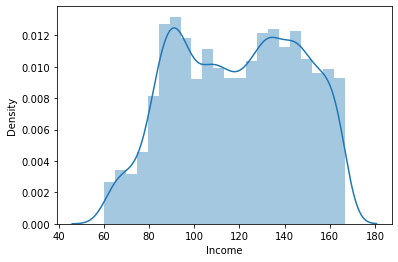

In [76]:
sns.distplot(marketing_df['Income'].apply(lambda x: np.power(x,l1)),hist=True)

In [78]:
_1,l1=stats.boxcox(marketing_df['Income'].apply(lambda x: np.power(x,l1)))
print(_1)
print(l1)

[128.09819109 120.14015208 114.53556654 ... 142.98627724  83.36466029
  83.94694497]
1.0000001881629772


<AxesSubplot:xlabel='CLV'>

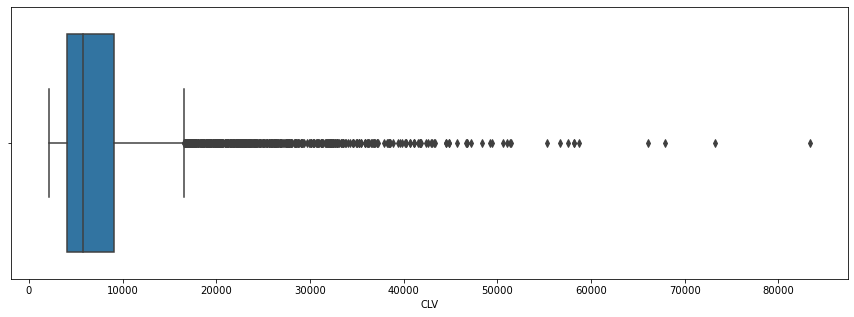

In [79]:
plt.figure(figsize=(15,5))
sns.boxplot(x="CLV", data=marketing_df)

<AxesSubplot:xlabel='CLV', ylabel='Density'>

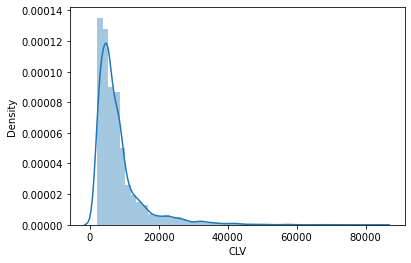

In [81]:
sns.distplot(marketing_df['CLV'],hist=True)

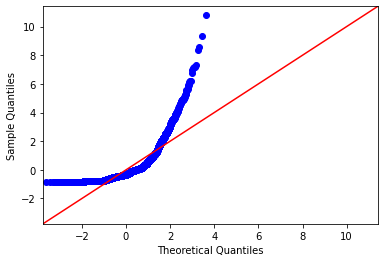

In [82]:
plot=sm.qqplot(marketing_df['CLV'], line="45", fit = True)

In [87]:
from scipy import stats
_2,l2=stats.boxcox(marketing_df['CLV'])
print(_2)
print(l2)

[2.60079804 2.66735586 2.60180986 ... 2.68467128 2.60708617 2.64818003]
-0.3628046005612987


In [88]:
stats.anderson(marketing_df['CLV'],dist='norm')

AndersonResult(statistic=536.2865472970825, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<AxesSubplot:xlabel='CLV', ylabel='Density'>

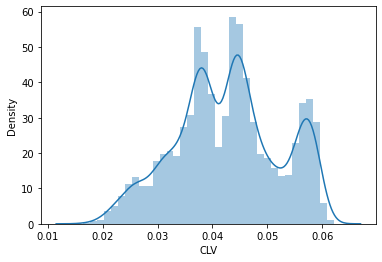

In [93]:
sns.distplot(marketing_df['CLV'].apply(lambda x: 1/np.power(x,np.abs(l2))),hist=True)  # abs to make the value positive

In [94]:
_1,l1=stats.boxcox(marketing_df['CLV'].apply(lambda x: 1/np.power(x,np.abs(l2))))
print(_1)                                                                         #
print(l1)

 #boxcox is close to 1 which indicate data is normally distributed

[-0.94358158 -0.96772907 -0.94394867 ... -0.97401118 -0.94586294
 -0.96077198]
0.9999998972585702
